In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
print(tf.__version__)

2.13.0


In [5]:
tf.test.is_built_with_cuda()

False

In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 189s 1us/step


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [13]:
x_train[0].shape

(32, 32, 3)

In [14]:
y_train.shape

(50000, 1)

In [16]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

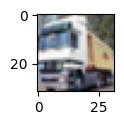

In [24]:
plot_sample(1)

In [25]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [26]:
classes[y_train[3][0]]

'deer'

In [27]:
#scaling the images: because after this model tends to perform better 

In [28]:
# dividing the training sample by 255 because the rgb value are in range 0 to 255

In [29]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
#no need to do for y because it is a classification part 

In [30]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [35]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_test_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
x_train.shape # we have 50000 imaage and each has size 50 by 50 by 3

(50000, 32, 32, 3)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),                  
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#for discrete value y_train use sparse categorical crossentropy but since it is onehot encoded use catgorical crossentropy 
model.fit(x_train_scaled,y_train_categorical,epochs=50,callbacks=[tb_callback])

Epoch 1/50
1563/1563 [==============================] - 402s 255ms/step - loss: 1.8943 - accuracy: 0.3247
Epoch 2/50
1563/1563 [==============================] - 398s 255ms/step - loss: 1.6551 - accuracy: 0.4080
Epoch 3/50
1563/1563 [==============================] - 400s 256ms/step - loss: 1.5787 - accuracy: 0.4344
Epoch 4/50
1563/1563 [==============================] - 399s 255ms/step - loss: 1.5313 - accuracy: 0.4517
Epoch 5/50
1563/1563 [==============================] - 399s 255ms/step - loss: 1.4954 - accuracy: 0.4658
Epoch 6/50
1563/1563 [==============================] - 406s 260ms/step - loss: 1.4661 - accuracy: 0.4749
Epoch 7/50
1563/1563 [==============================] - 412s 264ms/step - loss: 1.4331 - accuracy: 0.4890
Epoch 8/50
 476/1563 [========>.....................] - ETA: 4:52 - loss: 1.3933 - accuracy: 0.5004

In [ ]:
model.predict(x_test_scaled)[0]

In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[0])]